<a href="https://colab.research.google.com/github/AditShah1234/DeepLearning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [6]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from matplotlib import pyplot

# Data Preperation

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') # Type casting
x_test = x_test.astype('float32')
x_train /= 255 # Normalization
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes) #Converting to the categorical 
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Visualization

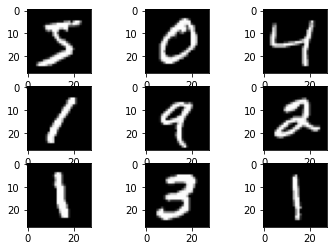

In [24]:

for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(np.reshape(x_train[i],(28,28)), cmap=pyplot.get_cmap('gray'))
pyplot.show()
  # print(np.reshape(x_train[i],(28,28)).shape)

In [3]:
# Sequential Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25, name = 'layer1'))
model.add(Flatten())
model.add(Dense(128, activation='relu',name = 'layer2'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer= "adam",
              metrics=['accuracy'])

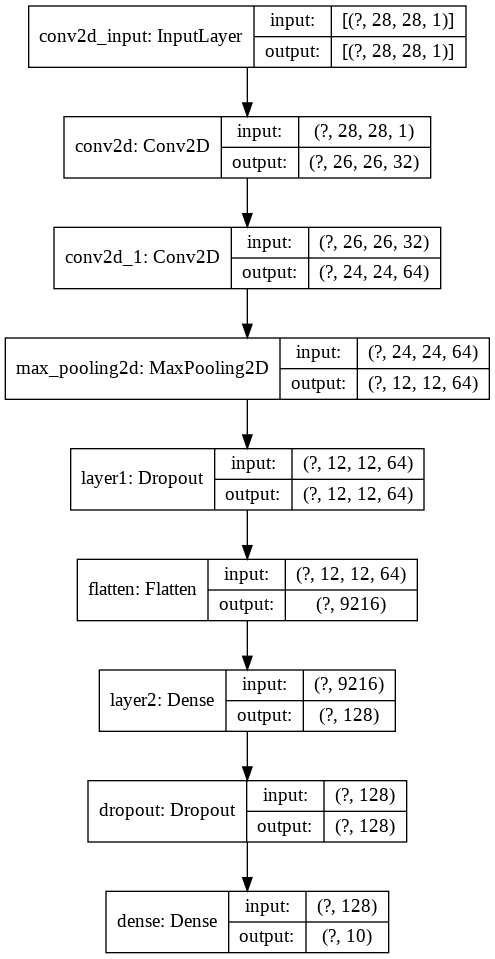

In [4]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [5]:
history = model.fit(x_train, y_train,
          batch_size=128, epochs=6,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 [==============================] - 4s 9ms/step - loss: 0.2459 - accuracy: 0.9253 - val_loss: 0.0555 - val_accuracy: 0.9808
Epoch 2/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0853 - accuracy: 0.9747 - val_loss: 0.0375 - val_accuracy: 0.9871
Epoch 3/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0622 - accuracy: 0.9810 - val_loss: 0.0341 - val_accuracy: 0.9880
Epoch 4/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 5/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 6/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.0293 - val_accuracy: 0.9907
